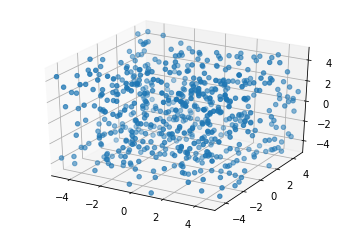

In [54]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
N = 600
L = 10
Lmin=-L/2
Lmax = L/2
V = L*L*L
coords=numpy.random.uniform(low=Lmin, high=Lmax, size=(N,3))
dr = 0.01
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z)

ax.set_xlim3d(Lmin,Lmax)
ax.set_ylim3d(Lmin,Lmax)
ax.set_zlim3d(Lmin,Lmax)

plt.grid()
#plt.axes().set_aspect("equal")

In [55]:
print(coords)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]

[[ 1.4768099   1.85051082 -0.21333136]
 [-3.36320335  0.51072322 -3.69925488]
 [-4.86954267 -4.64249954  4.27632023]
 ...
 [-4.3480901   3.99640627  4.85360763]
 [-4.7667923   2.95637918  2.76321562]
 [-4.31703594 -1.34901819 -3.88387987]]


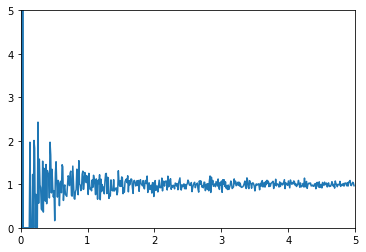

In [65]:
def pbc(d,L):
    return d - L * ((d+L/2)//L)

def rdf(coords,L,dr):
    rmax = L/2
    nbins = int(rmax//dr)
    r = numpy.array([i*dr for i in range(nbins)])    
    bins = numpy.zeros(nbins)
    for i,a in enumerate(coords[:-1]):#all but the last
        for b in coords[i+1:]:
            delta = b-a
            for h in range(3):
                delta[h] = pbc(delta[h],L)
            d = numpy.absolute(numpy.linalg.norm(delta))
            index = int(d//dr)
            if index<nbins:
                bins[index] += 1 
    for i, b in enumerate(bins):
        bins[i] /= N*(N-1)*numpy.pi*(4*numpy.square(dr*(i+1))*dr)/(2*V) #normalize by volume of annulus AND number of pairs
    #Note: Number of Pairs is N*(N-1)/2 (Sum of numbers from 1 to N-1)    
        
    return r, bins
r,bins = rdf(coords, L, dr)
plt.plot(r,bins)
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()